In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import graphviz
import os
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set2.py
# sklearn dataset
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D, axes3d

# sklearn 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2.3.9 신경망(딥러닝)

**다층 퍼셉트론**은 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있습니다.

### 신경망 모델

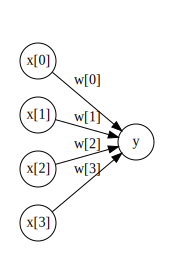

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며,  
중간 단계를 구성하는 **은닉 유닛**을 계산하고  
이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산합니다.

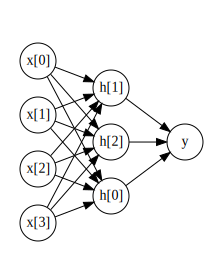

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루(ReLU)나 하이퍼볼릭 탄젠트(tanh)를 적용합니다.  
- 렐루 함수는 0 이하를 잘라버립니다.  
- tanh 함수는 낮은 입력값에 대해서는 -1로 수렴하고 높은 입력값에 대해서는 +1로 수렴합니다.

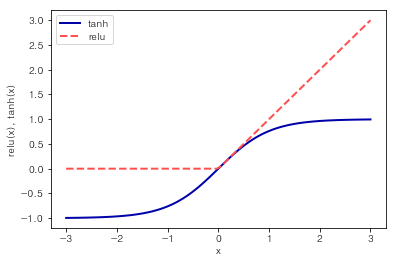

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle = '--', label = "relu")
plt.legend(loc = "best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)");

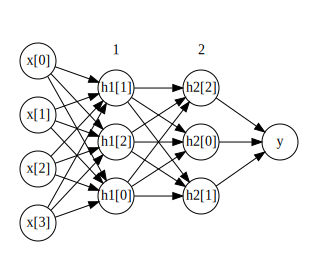

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

### 신경망 튜닝

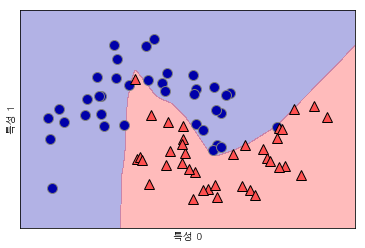

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1");

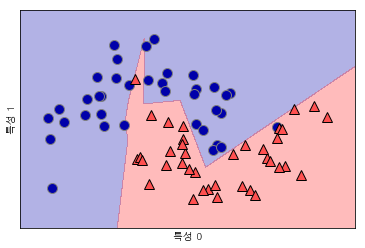

In [8]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1");

결정 경계가 은닉유닛 100개 사용할 때보다 10개 사용할 때가 더 날카로워졌습니다.  
더 매끄러운 결정 경계를 원한다면 은닉 유닛을 추가하거나 은닉층을 추가하거나 tanh 함수를 사용할 수 있습니다.

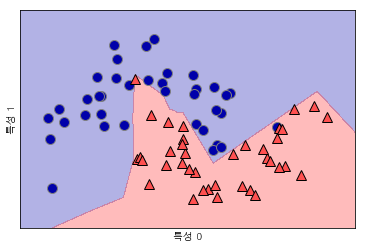

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1");

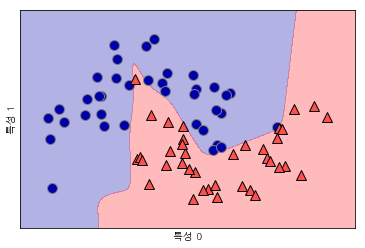

In [10]:
# tanh 활성화 함수가 적용되고 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh', random_state = 0, hidden_layer_sizes = [10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1");

리지 회귀와 선형 분류기에서 한 것처럼 L2 페널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 줄일 수 있습니다.  
MLPClassifier에서 이런 역할을 하는 매개변수는 alpha( = 선형 회귀 모델)이고 기본값은 매우 낮게(거의 규제하지 않게) 되어 있습니다.

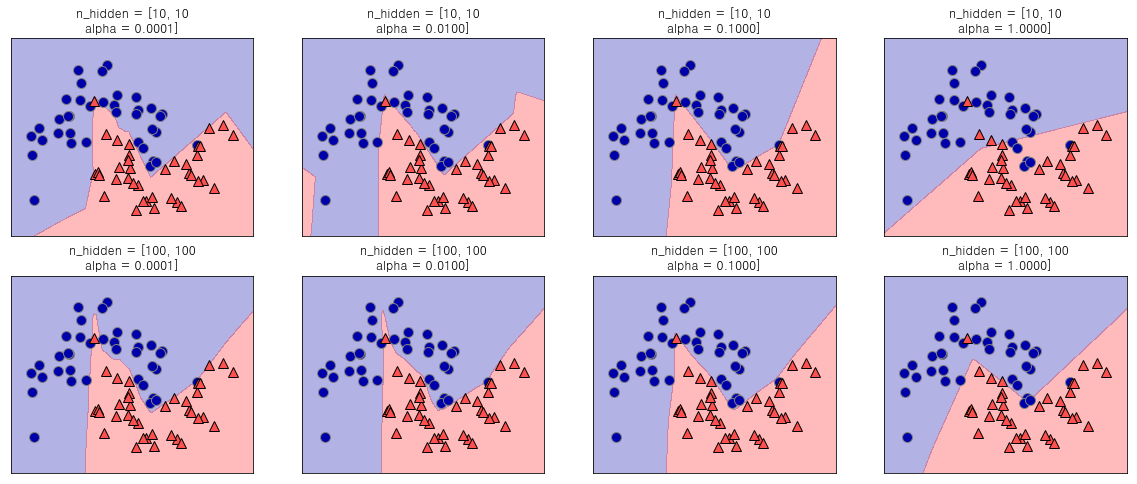

In [11]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for axx, nhn in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [nhn, nhn], alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title("n_hidden = [{}, {}\nalpha = {:.4f}]".format(nhn, nhn, alpha))

무작위로 다른 초깃값을 주되 같은 매개변수로 학습한 결정 경계

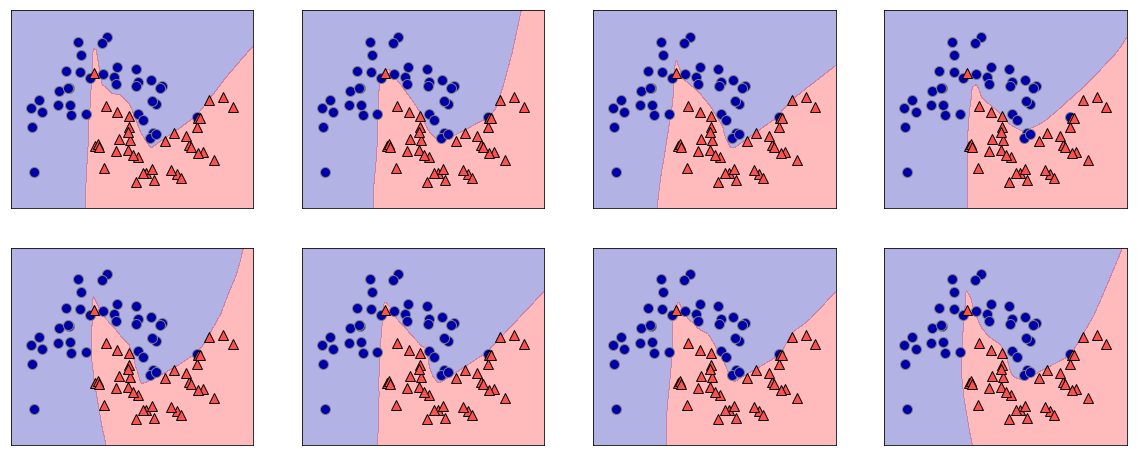

In [12]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for i, ax in enumerate(axes.ravel()):
        mlp = MLPClassifier(solver = 'lbfgs', random_state = i, hidden_layer_sizes = [100, 100])
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax);

In [13]:
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값 : \n", cancer.data.max(axis = 0))

유방암 데이터의 특성별 최댓값 : 
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.92


모든 입력 특성을 평균은 0, 분산은 1이 되도록 데이터 스케일을 맞춰줍니다.

In [15]:
# 훈련 세트 각 특성의 평균을 계산합니다.
mean_on_train = X_train.mean(axis = 0)

# 훈련 세트 각 특성의 표준 편차를 계산합니다.
std_on_train = X_train.std(axis = 0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train

# (훈련 데이터의 편균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.965


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


반복 횟수를 늘려 성능을 올렸지만 일반화 성능을 더 올리기 위해 모델의 복잡도를 낮춰줍니다.  
가중치를 더 강하게 규제하도록 alpha 매개변수를 0.0001에서 1로 아주 크게 증가시킵니다.

In [17]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


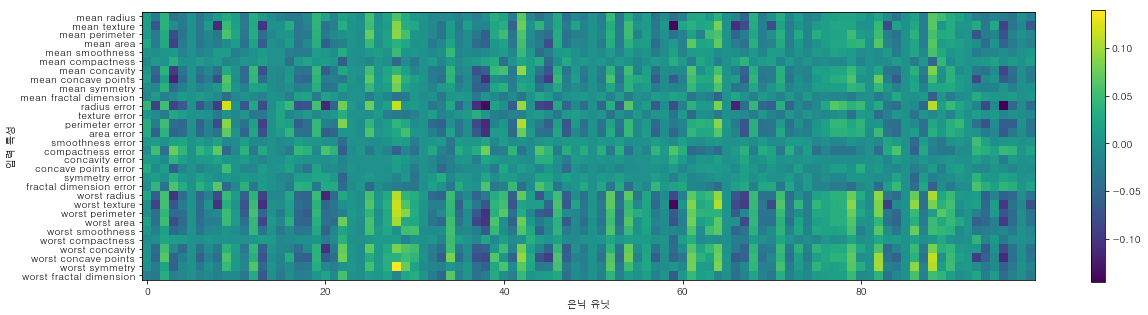

In [18]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar();

### 장단점과 매개변수

**주요한 장점**  
대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다는 점  
(충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 냅니다.)  

**단점**  
학습이 오래 걸립니다.  
전처리에 주의해야 합니다.  